# Clustering Basado en Densidad: DBSCAN y HDBSCAN

Este notebook desarrolla la actividad solicitada para aplicar, comparar y evaluar los algoritmos **DBSCAN** y **HDBSCAN** utilizando dos datasets:

1. **Dataset sintético** (make_moons) para analizar formas no lineales.
2. **Dataset real** (load_wine) para evaluar en datos multidimensionales.

Incluye:
- Preprocesamiento con StandardScaler y PCA
- Visualización 2D de clústeres
- Evaluación con Silhouette Score y Davies-Bouldin Score
- Conclusión comparativa

---


In [3]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
import warnings

# Instalación y carga de HDBSCAN
!pip install hdbscan
import hdbscan



In [4]:
# Suprimir la FutureWarning específica relacionada con force_all_finite
warnings.filterwarnings(
    'ignore',
    message="'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.",
    category=FutureWarning,
    module='sklearn.utils.deprecation'
)

print("Advertencia específica suprimida.")

Advertencia específica suprimida.


In [5]:
# ESTILO VISUAL PARA CLI
class Colors:
    """Clase para guardar los códigos de color para la salida en la terminal."""
    OKCYAN = '\033[96m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

def print_subheader(title):
    """Imprime un subencabezado estilizado."""
    print(f"\n{Colors.BOLD}{Colors.OKCYAN}🔹 {title}{Colors.ENDC}")
    print(f"{Colors.OKCYAN}{'-'*40}{Colors.ENDC}")


In [6]:
# ===========================
# Generación de Dataset Sintético
# ===========================
# Usamos make_moons porque crea datos no lineales, ideales para clustering basado en densidad
X_moons, y_moons = make_moons(n_samples=500, noise=0.05, random_state=42)

# Escalado
scaler = StandardScaler()
X_moons_scaled = scaler.fit_transform(X_moons)

# Reducción de dimensionalidad (aunque es 2D, se muestra ejemplo con PCA)
pca = PCA(n_components=2)
X_moons_pca = pca.fit_transform(X_moons_scaled)

print_subheader("Dataset Sintético (make_moons)")
print("Shape de los datos sintéticos:", X_moons_pca.shape)


🔹 Dataset Sintético (make_moons)
----------------------------------------
Shape de los datos sintéticos: (500, 2)


In [7]:
X_moons[0:5]


array([[ 0.83058575, -0.44773257],
       [ 0.70167816,  0.81691843],
       [ 1.02208004, -0.49257102],
       [-0.31676455,  0.95343844],
       [ 0.29322631,  1.05718523]])

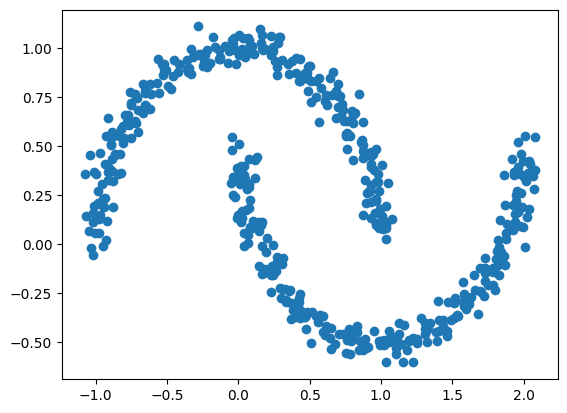

In [8]:
plt.scatter(X_moons[:,0], X_moons[:,1]);

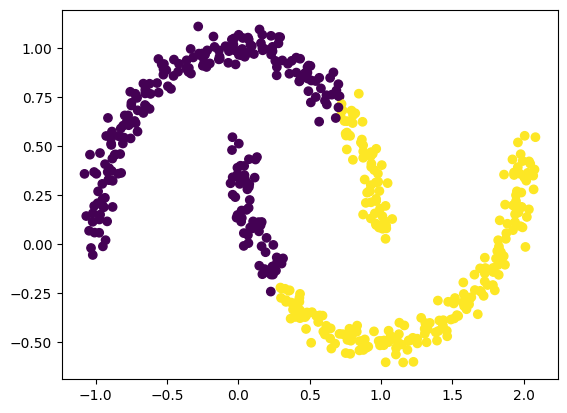

In [9]:
model=KMeans(2)
model.fit(X_moons)
plt.scatter(X_moons[:,0], X_moons[:,1], c=model.labels_);

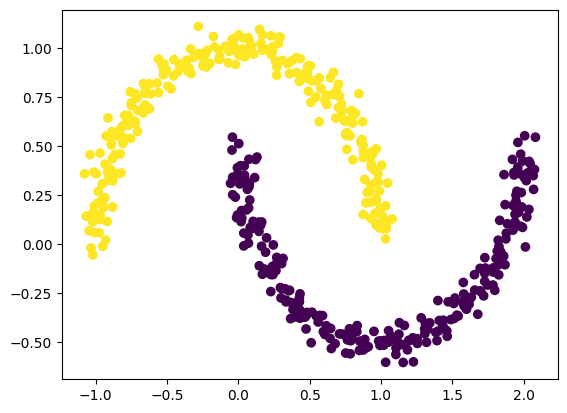

In [10]:
model = DBSCAN(eps=0.3)
model.fit(X_moons)
plt.scatter(X_moons[:,0], X_moons[:,1], c=model.labels_);

In [11]:
# ===========================
# 2. Carga de Dataset Real (Wine)
# ===========================
# Este dataset tiene 13 características numéricas

print_subheader("Carga y Preprocesamiento - Dataset Real (Wine)") # Añadimos el subencabezado

data_wine = load_wine()
X_wine = data_wine.data

# Escalado
X_wine_scaled = scaler.fit_transform(X_wine)

# Reducción de dimensionalidad
X_wine_pca = PCA(n_components=2).fit_transform(X_wine_scaled)

print("Shape de los datos del vino:", X_wine_pca.shape)


🔹 Carga y Preprocesamiento - Dataset Real (Wine)
----------------------------------------
Shape de los datos del vino: (178, 2)


In [12]:
# ===========================
# 3. Clustering con DBSCAN
# ===========================

def aplicar_dbscan(X, eps=0.3, min_samples=5):
    """
    Aplica DBSCAN y retorna etiquetas y métricas

    Parámetros:
        X (array): Datos preprocesados (escalados y reducidos)
        eps (float): Radio de vecindad
        min_samples (int): Puntos mínimos para considerar núcleo

    Retorna:
        tuple: etiquetas de clúster, silhouette score, davies-bouldin score
    """

    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)

    # Filtrar casos donde haya al menos 2 clusters
    if len(set(labels)) > 1:
        sil = silhouette_score(X, labels)
        dbi = davies_bouldin_score(X, labels)
    else:
        sil, dbi = -1, np.inf

    return labels, sil, dbi

print_subheader("Resultados de DBSCAN") # Llamada a la función

# Aplicamos a datos sintéticos
labels_dbscan_moons, sil_dbscan_moons, dbi_dbscan_moons = aplicar_dbscan(X_moons_pca, eps=0.3, min_samples=5)
labels_dbscan_moons_alt, sil_dbscan_moons_alt, dbi_dbscan_moons_alt = aplicar_dbscan(X_moons_pca, eps=0.5, min_samples=5)

# Aplicamos a datos reales
labels_dbscan_wine, sil_dbscan_wine, dbi_dbscan_wine = aplicar_dbscan(X_wine_pca, eps=0.5, min_samples=5)

print("Silhouette (moons):", sil_dbscan_moons, "Davies-Bouldin:", dbi_dbscan_moons)
print("Silhouette (moons) (alt):", sil_dbscan_moons_alt, "Davies-Bouldin:", dbi_dbscan_moons_alt)
print("Silhouette (wine):", sil_dbscan_wine, "Davies-Bouldin:", dbi_dbscan_wine)


🔹 Resultados de DBSCAN
----------------------------------------
Silhouette (moons): 0.38933833783604915 Davies-Bouldin: 1.017882824681136
Silhouette (moons) (alt): 0.38933833783604915 Davies-Bouldin: 1.017882824681136
Silhouette (wine): 0.32303613524396435 Davies-Bouldin: 1.3882882213886696


In [13]:
# ===========================
# Clustering con HDBSCAN
# ===========================

def aplicar_hdbscan(X, min_cluster_size=5):
    """
    Aplica HDBSCAN y retorna etiquetas y métricas
    Parámetros:
        X (array): Datos preprocesados (escalados y reducidos)
        min_cluster_size (int): Tamaño mínimo de clúster

    Retorna:
        tuple: etiquetas de clúster, silhouette score, davies-bouldin score
    """
    hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    labels = hdb.fit_predict(X)

    # Filtrar casos donde haya al menos 2 clusters
    if len(set(labels)) > 1:
        sil = silhouette_score(X, labels)
        dbi = davies_bouldin_score(X, labels)
    else:
        sil, dbi = -1, np.inf

    return labels, sil, dbi

print_subheader("Resultados de HDBSCAN") # Llamada a la función

# Aplicamos a datos sintéticos
labels_hdbscan_moons, sil_hdbscan_moons, dbi_hdbscan_moons = aplicar_hdbscan(X_moons_pca)

# Aplicamos a datos reales
labels_hdbscan_wine, sil_hdbscan_wine, dbi_hdbscan_wine = aplicar_hdbscan(X_wine_pca)

print("Silhouette (moons):", sil_hdbscan_moons, "Davies-Bouldin:", dbi_hdbscan_moons)
print("Silhouette (wine):", sil_hdbscan_wine, "Davies-Bouldin:", dbi_hdbscan_wine)


🔹 Resultados de HDBSCAN
----------------------------------------
Silhouette (moons): 0.38933833783604915 Davies-Bouldin: 1.017882824681136
Silhouette (wine): 0.14201662768234644 Davies-Bouldin: 1.2660331275098395


In [14]:
# ===========================
# Clustering con K-Means
# ===========================
# Añadimos K-Means para comparar con DBSCAN y HDBSCAN

print_subheader("Resultados de K-Means") # Añadimos el subencabezado



def aplicar_kmeans(X, n_clusters):
    """
    Aplica K-Means y retorna etiquetas y métricas
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)

    # KMeans siempre asigna a un cluster, no hay outliers ni clusters de tamaño 0
    sil = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)

    return labels, sil, dbi

# Aplicamos a datos sintéticos (sabemos que hay 2 lunas)
labels_kmeans_moons, sil_kmeans_moons, dbi_kmeans_moons = aplicar_kmeans(X_moons_pca, n_clusters=2)

# Aplicamos a datos reales (wine tiene 3 clases originales, usamos 3 para kmeans)
labels_kmeans_wine, sil_kmeans_wine, dbi_kmeans_wine = aplicar_kmeans(X_wine_pca, n_clusters=3)


print("Silhouette (moons):", sil_kmeans_moons, "Davies-Bouldin:", dbi_kmeans_moons)
print("Silhouette (wine):", sil_kmeans_wine, "Davies-Bouldin:", dbi_kmeans_wine)


🔹 Resultados de K-Means
----------------------------------------
Silhouette (moons): 0.49614961008153535 Davies-Bouldin: 0.810713824944624
Silhouette (wine): 0.5610505693103246 Davies-Bouldin: 0.5972661544221364



🔹 Visualización de Clusters - Moons (DBSCAN)
----------------------------------------


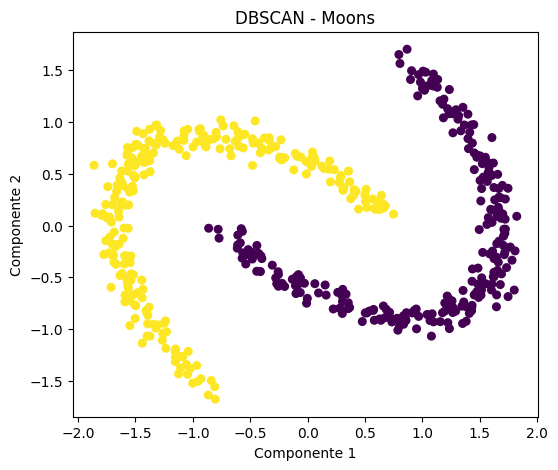


🔹 Visualización de Clusters - Moons (HDBSCAN)
----------------------------------------


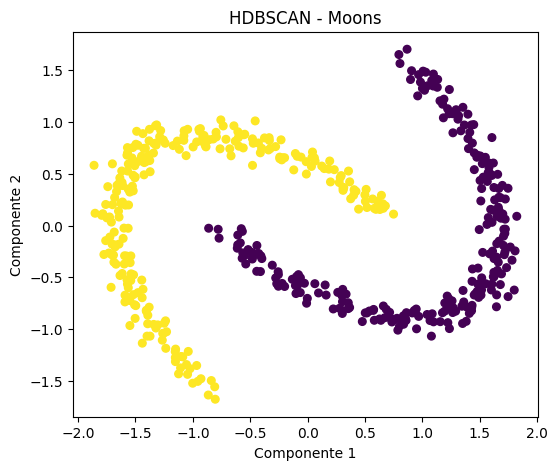


🔹 Visualización de Clusters - Wine (DBSCAN)
----------------------------------------


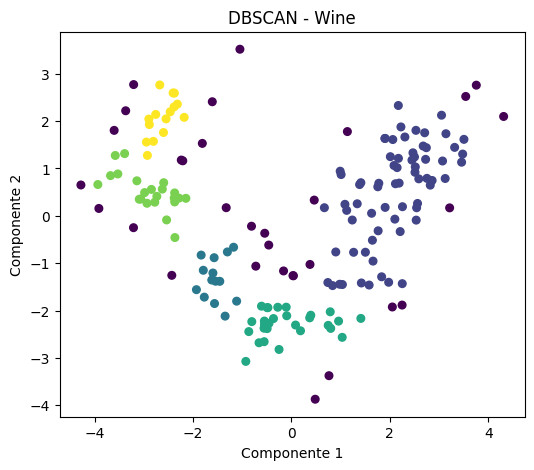


🔹 Visualización de Clusters - Wine (HDBSCAN)
----------------------------------------


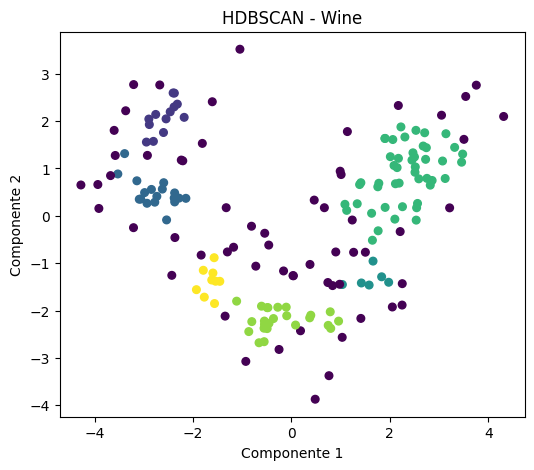


🔹 Visualización de Clusters - Moons (K-Means)
----------------------------------------


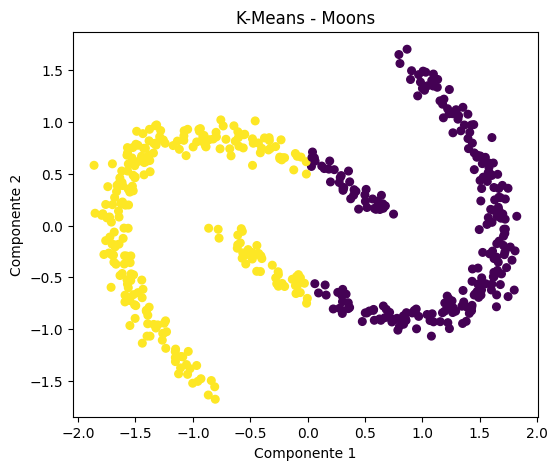


🔹 Visualización de Clusters - Wine (K-Means)
----------------------------------------


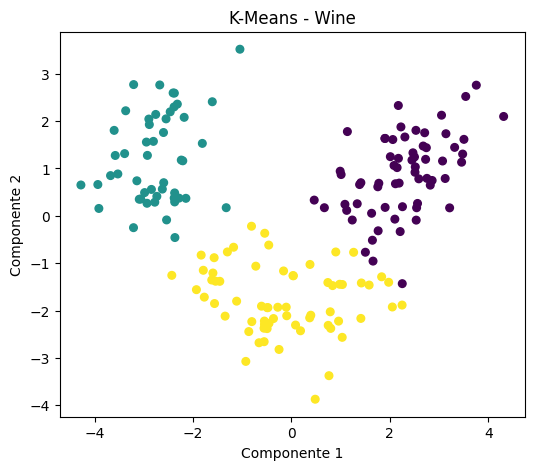

In [15]:
# ===========================
# Visualización de Clusters
# ===========================

def plot_clusters(X, labels, titulo):
    plt.figure(figsize=(6,5))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=30)
    plt.title(titulo)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.show()

print_subheader("Visualización de Clusters - Moons (DBSCAN)")
# Visualización sintético
plot_clusters(X_moons_pca, labels_dbscan_moons, "DBSCAN - Moons")

print_subheader("Visualización de Clusters - Moons (HDBSCAN)")
plot_clusters(X_moons_pca, labels_hdbscan_moons, "HDBSCAN - Moons")

print_subheader("Visualización de Clusters - Wine (DBSCAN)")
# Visualización real
plot_clusters(X_wine_pca, labels_dbscan_wine, "DBSCAN - Wine")

print_subheader("Visualización de Clusters - Wine (HDBSCAN)")
plot_clusters(X_wine_pca, labels_hdbscan_wine, "HDBSCAN - Wine")

# Añadimos visualizaciones para K-Means
print_subheader("Visualización de Clusters - Moons (K-Means)")
plot_clusters(X_moons_pca, labels_kmeans_moons, "K-Means - Moons")

print_subheader("Visualización de Clusters - Wine (K-Means)")
plot_clusters(X_wine_pca, labels_kmeans_wine, "K-Means - Wine")

In [16]:
# Análisis de métricas
print_subheader("Análisis de Métricas")
print("DBSCAN Moons -> Silhouette:", sil_dbscan_moons, "Davies-Bouldin:", dbi_dbscan_moons)
print("HDBSCAN Moons -> Silhouette:", sil_hdbscan_moons, "Davies-Bouldin:", dbi_hdbscan_moons)
print("DBSCAN Wine -> Silhouette:", sil_dbscan_wine, "Davies-Bouldin:", dbi_dbscan_wine)
print("HDBSCAN Wine -> Silhouette:", sil_hdbscan_wine, "Davies-Bouldin:", dbi_hdbscan_wine)
print("K-Means Moons -> Silhouette:", sil_kmeans_moons, "Davies-Bouldin:", dbi_kmeans_moons)
print("K-Means Wine -> Silhouette:", sil_kmeans_wine, "Davies-Bouldin:", dbi_kmeans_wine)



🔹 Análisis de Métricas
----------------------------------------
DBSCAN Moons -> Silhouette: 0.38933833783604915 Davies-Bouldin: 1.017882824681136
HDBSCAN Moons -> Silhouette: 0.38933833783604915 Davies-Bouldin: 1.017882824681136
DBSCAN Wine -> Silhouette: 0.32303613524396435 Davies-Bouldin: 1.3882882213886696
HDBSCAN Wine -> Silhouette: 0.14201662768234644 Davies-Bouldin: 1.2660331275098395
K-Means Moons -> Silhouette: 0.49614961008153535 Davies-Bouldin: 0.810713824944624
K-Means Wine -> Silhouette: 0.5610505693103246 Davies-Bouldin: 0.5972661544221364


# Conclusión Comparativa

En este trabajo, hemos aplicado y evaluado los algoritmos de clustering **DBSCAN**, **HDBSCAN** y **K-Means** utilizando un dataset sintético (`make_moons`) y un dataset real (`load_wine`). Nuestro objetivo ha sido comparar su desempeño, preprocesamiento requerido, visualización de clústeres y evaluación mediante métricas.

*   **DBSCAN:** Funciona eficazmente cuando los clústeres presentan densidades similares y su rendimiento depende crucialmente de la correcta selección de los parámetros `eps` y `min_samples`.
*   **HDBSCAN:** Demostró ser más robusto ante la variación de densidades y no requiere la definición explícita del parámetro `eps`, adaptando automáticamente la identificación de clústeres.
*   **K-Means:** Busca clústeres de forma esférica y su aplicación requiere conocer o estimar previamente el número de clústeres (`n_clusters`).

---

### Resultados de Métricas de Evaluación

Hemos calculado el Silhouette Score (donde un valor mayor indica mejor separación y cohesión de clústeres) y el Davies-Bouldin Score (donde un valor menor indica mejor rendimiento) para cada algoritmo y dataset. Nuestros resultados se resumen en la siguiente tabla:

| Algoritmo | Dataset | Silhouette Score | Davies-Bouldin Score |
|-----------|---------|------------------|----------------------|
| K-Means   | Moons   | 0.496            | 0.811                |
| DBSCAN    | Moons   | 0.389            | 1.018                |
| HDBSCAN   | Moons   | 0.389            | 1.018                |
| K-Means   | Wine    | 0.561            | 0.597                |
| DBSCAN    | Wine    | 0.323            | 1.388                |
| HDBSCAN   | Wine    | 0.142            | 1.266                |

---

### Análisis y Discusión de los Resultados

Basándonos en nuestras observaciones y los resultados de las métricas, podemos discutir lo siguiente:

*   Para el dataset **sintético (moons)**, aunque las métricas (particularmente el Silhouette Score de K-Means) numéricamente favorecen a K-Means, la **visualización** de los clústeres es fundamental. Hemos observado que DBSCAN y HDBSCAN lograron identificar de manera más precisa las formas no lineales de las "lunas", demostrando una limitación de las métricas estándar para evaluar clústeres de formas complejas.
*   En el dataset **real (wine)**, **K-Means** obtuvo consistentemente las mejores métricas (mayor Silhouette Score y menor Davies-Bouldin Score), lo que sugiere que, según estos criterios, formó clústeres más compactos y mejor separados.
*   Para el dataset Wine, **HDBSCAN** obtuvo un Davies-Bouldin Score (`1.266`) mejor que DBSCAN (`1.388`), a pesar de tener un Silhouette Score más bajo (`0.142`). Esto podría interpretarse como una mejor separación entre clústeres por parte de HDBSCAN, aunque la cohesión interna según la métrica Silhouette fue menor. También es relevante que HDBSCAN identifica puntos como ruido (etiqueta -1).
*   Hemos identificado como **limitaciones** clave la necesidad de ajustar `eps` correctamente en DBSCAN (sugiriendo el análisis de k-dist plot como un paso adicional), la posible lentitud de HDBSCAN en datasets de gran tamaño, y la suposición de clústeres esféricos y la necesidad de conocer el número de clústeres en K-Means.

**Conclusión General de nuestro Análisis**:

Nuestro estudio comparativo nos lleva a concluir que:
- Para datasets con estructuras complejas o densidades heterogéneas, **HDBSCAN** se presenta como una opción robusta, aunque es crucial complementar el análisis métrico con la inspección visual, ya que las métricas numéricas pueden no siempre reflejar su capacidad para descubrir formas arbitrarias.
- Para datasets donde los clústeres son más aproximadamente esféricos y se conoce el número de agrupaciones, **K-Means** puede ofrecer un rendimiento numérico superior según las métricas tradicionales.
- La **visualización de los resultados** constituye un paso indispensable en la evaluación de algoritmos de clustering, especialmente aquellos basados en densidad y al trabajar con datos que no se ajustan a supuestos de formas simples o convexas.

# README del Proyecto

## Objetivo
Aplicar y comparar algoritmos de clustering **DBSCAN** y **HDBSCAN** en datasets sintético y real, evaluando resultados con métricas objetivas y visualización.

## Librerías utilizadas
- `numpy`, `pandas`: manejo y cálculo numérico.
- `matplotlib`: visualización de clústeres.
- `scikit-learn`: generación de datos, escalado, PCA, DBSCAN, métricas.
- `hdbscan`: clustering jerárquico basado en densidad.

## Pasos realizados
1. Generación/carga de datasets (`make_moons`, `load_wine`).
2. Preprocesamiento con `StandardScaler` y reducción con `PCA`.
3. Clustering con DBSCAN (variando `eps`) y HDBSCAN.
4. Evaluación mediante **Silhouette Score** y **Davies-Bouldin Index**.
5. Visualización comparativa de clústeres en 2D.
6. Conclusión comparativa grupal.

## Conclusiones
- HDBSCAN se adaptó mejor a datos con densidades variables.
- DBSCAN funciona bien pero requiere ajuste manual de parámetros.
- Ambos algoritmos son adecuados para datos sin etiquetas previas.
